# Maxwell-Boltzmann gas kinetics

The distribution of molecular speeds in an ideal gas at equilibrium is given by the Maxwell-Boltzmann distribution:

\begin{equation}
f(c) = 4\pi c^2 \left( \frac{m}{2\pi k_\mathrm{B} T}\right)^\frac{3}{2} \mathrm{exp}\left(\frac{-mc^2}{2 k_\mathrm{B}T}\right)
\end{equation}

where $f(c)$ is the probability of a molecule having a speed $c$. The specific shape of the distribution also depends on the molecular mass, $m$, and the temperature, $T$.

To plot this distribution, we first define a function `f( c, m, temp )` that returns the Maxwell-Boltzmann distribution value $f(v)$ for specific values of $m$ and $T$:

In [1]:
# Import the Boltzmann constant from scipy.constants
import math
import numpy as np
from scipy.constants import k

# define the function f, as a function of speed, mass, and temperature:
def f( c, m, temp ):
    return 4.0*math.pi*c**2 * (m/(2.0*math.pi*k*temp))**1.5 * np.exp((-m*c**2)/(2.0*k*temp))

We first import the `math` module, so that we can use `math.pi`.  
We also import `numpy` (as `np`), so that we can use `np.exp` to calculate exponentials.  
Finally, we import the Boltzmann constant, $k_\mathrm{B}$, directly from `scipy.constants`.  
https://docs.scipy.org/doc/scipy/reference/constants.html

We can now plot $f(c)$ for a range of $c$ values, for any molecular mass and temperature.

In [2]:
# define some molecular masses in kg
from scipy.constants import Avogadro # import Avogadro's constant.
mass_of_N2  = 28e-3 / Avogadro
mass_of_H2  = 2e-3  / Avogadro

In [3]:
# set up our notebook for plotting
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # uncomment this line for high-DPI screens

## Example 1: changing temperature

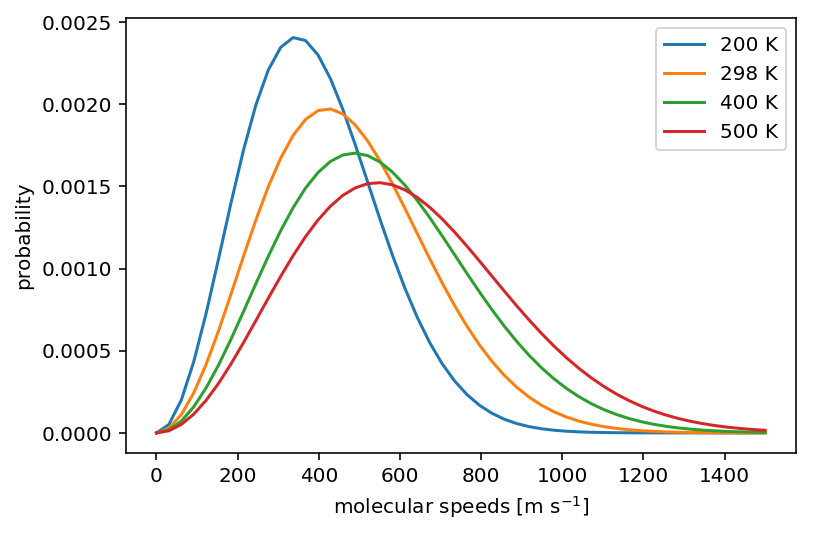

In [4]:
# generate an array of velocity values, from zero to 1500 m s^-1.
import numpy as np
c = np.linspace(0,1500)

# plot f(c) for N2 at four temperatures
plt.plot( c, f( c, mass_of_N2, 200.0 ), label='200 K' )
plt.plot( c, f( c, mass_of_N2, 298.0 ), label='298 K' )
plt.plot( c, f( c, mass_of_N2, 400.0 ), label='400 K' )
plt.plot( c, f( c, mass_of_N2, 500.0 ), label='500 K' )
plt.xlabel(r'molecular speeds [m s$^{-1}$]')
plt.ylabel(r'probability')
plt.legend()
plt.show()

## Example 2: changing molecular mass

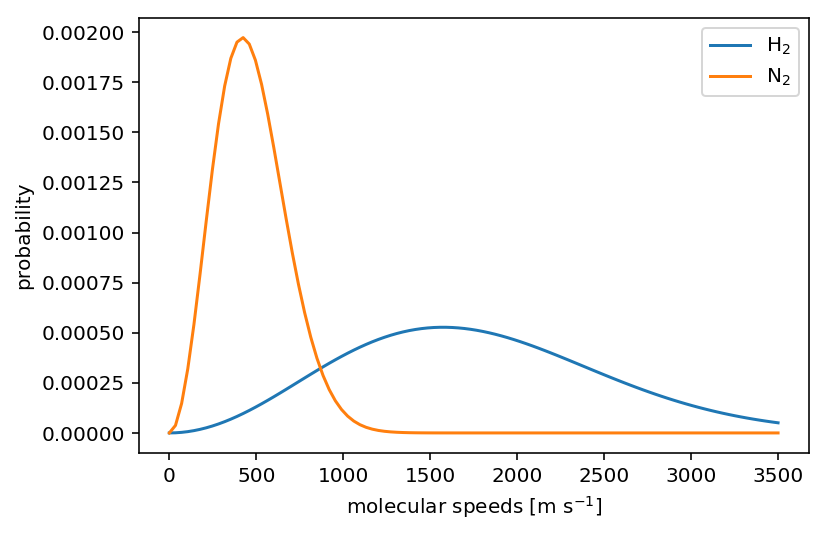

In [5]:
c = np.linspace(0,3500,100)

plt.plot( c, f( c, mass_of_H2,  298.0 ), label=r'H$_2$' )
plt.plot( c, f( c, mass_of_N2,  298.0 ), label=r'N$_2$' )
plt.xlabel(r'molecular speeds [m s$^{-1}$]')
plt.ylabel(r'probability')

plt.legend()
plt.show()

## Calculating the mean, most probable, and root-mean-squared speeds

### Mean speed

The **mean speed** is given by

\begin{equation}
c_\mathrm{mean}=\int_c c\,f(c)\,\mathrm{d}c.
\end{equation}

To calculate this computationally, we can approximate this integral as a sum over speeds:

\begin{equation}
c_\mathrm{mean}=\sum_c c\,f(c)\,\Delta c.
\end{equation}

In [6]:
def mean_speed( c, m, T ): # using numerical integration
    delta_c = max(c) / len(c)
    return sum( c * f( c, mass_of_N2, T ) ) * delta_c

In [7]:
print( "T vs. mean speed" )
for temp in [200, 298, 400, 500]:
    print( temp, mean_speed( c, mass_of_N2, temp ) )

T vs. mean speed
200 384.998519956
298 469.950104899
400 544.46937038
500 608.735160468


### Most probable speed

The **most probable** speed is given by the value of $c$ where $f(c)$ is a maximum.  
We can find the value that maximises a function using the `numpy` `argmax()` function.  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html

In [8]:
def most_probable_speed( c, m, temp ):
    return c[ np.argmax( f( c, m, temp ) ) ]

In [9]:
print( "T vs. most probable speed" )
for temp in [200, 298, 400, 500]:
    print( temp, most_probable_speed( c, mass_of_N2, temp ) )

T vs. most probable speed
200 353.535353535
298 424.242424242
400 494.949494949
500 530.303030303


### Root-mean-squared speed

The **root mean squared speed** can be derived from the distribution of speeds using a similar integral to the **mean speed**:

\begin{equation}
c_\mathrm{rms} = \left[\int_c c^2\,f(c)\,\mathrm{d}c\right]^\frac{1}{2}
\end{equation}

Again, we can calculate this by approximating the integral as a sum over speeds:

\begin{equation}
c_\mathrm{rms} = \left[\sum_c c^2\,f(c)\,\Delta c\right]^\frac{1}{2}
\end{equation}

In [10]:
def rms_speed( c, m, temp ): # using numerical integration
    delta_c = max(c) / len(c)
    return math.sqrt( sum( c**2 * f( c, mass_of_N2, temp ) ) * delta_c )

In [11]:
print( "T vs. rms speed" )
for temp in [200, 298, 400, 500]:
    print( temp, rms_speed( c, mass_of_N2, temp ) )

T vs. rms speed
200 419.9825318518981
298 512.6540132686845
400 593.9449925047447
500 664.0506890681057


### Alternate calculation of rms speed

The rms speed can also be derived from the kinetic theory of gases, which gives the expression
\begin{equation}
c_\mathrm{rms} = \left(\frac{3kT}{m}\right)^\frac{1}{2}.
\end{equation}
This gives us an alternate way to calculate the rms speed (and to check our previous method):

In [12]:
def rms_speed_equation( m, temp ):
    return math.sqrt( ( 3 * k * temp ) / m )

In [13]:
print( "T vs. rms speed (algebraic solution)" )
for temp in [200, 298, 400, 500]:
    print( temp, rms_speed_equation( mass_of_N2, temp ) )

T vs. rms speed (algebraic solution)
200 422.0983262594641
298 515.2366694794258
400 596.9371776511176
500 667.3960537623838


### Comparing these different speeds:

The following cell calculates these different &ldquo;average&rdquo; speeds for N<sub>2</sub>.

In [14]:
temp = 298.0
c = np.linspace(0,2000,100)
m = mass_of_N2

print( 'mean speed: {:.3f}'.format( mean_speed( c, m, temp ) ) )
print( 'most probable speed: {:.3f}'.format( most_probable_speed( c, m, temp ) ) )
print( 'rms speed (numerical integration): {:.3f}'.format( rms_speed( c, m, temp ) ) )
print( 'rms speed (analytical result): {:.3f}'.format( rms_speed_equation( m, temp ) ) )

mean speed: 469.950
most probable speed: 424.242
rms speed (numerical integration): 512.654
rms speed (analytical result): 515.237


### Numerical errors

The values for rms speeds obtained by numerical integration (method 1) do not agree exactly with the equivalent values obtained using the analytical expression, derived from the kinetic theory of gases (method 2). For the numerical integration, we have approximated an integral over a continuous function by a discrete sum. To increase the accuracy of this numerical integration, we can make the spacing $\Delta c$ smaller, i.e. increase the number of points in the sum:

In [15]:
print( 'rms speed (analytical result): {:.3f}'.format( rms_speed_equation( m, temp ) ) )

for n in [ 100, 1000, 10000, 100000, 1000000 ]:
    c = np.linspace(0,2000,n)
    print( 'rms speed (numerical integration): {:.3f} ({} points)'.format( rms_speed( c, m, temp ), n ) )

rms speed (analytical result): 515.237
rms speed (numerical integration): 512.654 (100 points)
rms speed (numerical integration): 514.979 (1000 points)
rms speed (numerical integration): 515.211 (10000 points)
rms speed (numerical integration): 515.234 (100000 points)
rms speed (numerical integration): 515.236 (1000000 points)


## Calculating the average kinetic energy, per molecule

The kinetic energy of a single molecule is given by

\begin{equation}
\frac{1}{2}mv^2
\end{equation}

where $v$ is the particle velocity.

For a system of molecules in equilibrium,  the average kinetic energy per molecule is
is given by
\begin{equation}
\int_c \frac{1}{2}m c^2\,f(c)\,\mathrm{d}{c}
\end{equation}

Again, we can approximate this by calculating the sum
\begin{equation}
\sum_c \frac{1}{2}m c^2\,f(c)\,\Delta{c}.
\end{equation}

In [16]:
def average_kinetic_energy( c, m, temp ):
    delta_c = max(c) / len(c)
    return 0.5 * m * sum( f(c, m, temp) * c**2 ) * delta_c

Calculating the average kinetic energy for N<sub>2</sub> at 298 K:

In [43]:
c = np.linspace(0,2000,n)
print( "{:.5e} J per molecule".format( average_kinetic_energy( c, mass_of_N2, temp ) ) )

6.17149e-21 J per molecule


Calculating the average kinetic energy for H<sub>2</sub> at 298 K:

In [46]:
c = np.linspace(0,10000,n) # we need the integral to extend to higher speeds for lighter molecules
print( "{:.5e} J per molecule".format( average_kinetic_energy( c, mass_of_H2, temp ) ) )

6.17149e-21 J per molecule


Using the kinetic theory of gases, we can derive a direct expression for the average kinetic energy per molecule:

\begin{equation}
c_\mathrm{rms}=\left(\frac{3kT}{m}\right)^\frac{1}{2}.
\end{equation}

Since

\begin{equation}
\mathrm{KE}_\mathrm{average} = \frac{1}{2}m c_\mathrm{rms}^2,
\end{equation}

we get

\begin{equation}
\mathrm{KE}_\mathrm{average} = \frac{1}{2}m\,\frac{3kT}{m}
\end{equation}

\begin{equation}
\mathrm{KE}_\mathrm{average} = \frac{3}{2}kT.
\end{equation}

In [48]:
print( "{:.5e} J per molecule".format( 3/2 * k * temp ) )

6.17150e-21 J per molecule
